# REGRESSION
Regression is about predicitng a relationship between two or more variables.
It predicts a continuous outcome.(a numeric outcome)
Example; 
- To predict house rate on the basis of size of house
- To predict the crime rate in a city on the basis of number of graduates.

In regression we have a independent variable("predictors", "target variable") and a dependent variable("labels", "outcome variable") .

## 1. Linear Regression
Linear Regression models the relationship between the variables through a linear equation __y = mx + b__ where m is the slope and b is the y intercept.

m and b can be found out by two methods:
- Ordinary Least Mean Square Method
- Gradient Descent

### Ordinary Least Mean Square Method
First step is to calculate the m.
\begin{equation*}
\beta_i  = \frac{\sum_{i} (x_i -\bar{x}) (y_i -\bar{y})}{\sum_{i} (x_i -\bar{x})^2} 
\end{equation*}

$\beta_i = m$

After finding $\beta_i$ , we can write the linear equation as:
$ b = \bar{y} - \beta_i\bar{x} $ 

$ \bar{x} $ is the mean of values of input variable X and $ \bar{y} $ is the mean of the output variable Y.

Now , we got values of m and b.

So first we will import all the libraries needed and load the dataset to test on.
Our dataset has 4 variables - Gender, Age Range , Head Size and Brain weights. We'll find the relationship between head size and brain weights.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
sumofsquares = 0
sumofresiduals = 0

for i in range(n) :
    y_pred = b0 + b1 * X[i]
    sumofsquares += (Y[i] - y_mean) ** 2
    sumofresiduals += (Y[i] - y_pred) **2
    
score  = 1 - (sumofresiduals/sumofsquares)

print(score)
dataset = pd.read_csv('dataset.csv')
print(dataset.shape)
dataset.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


As now we loaded our dataset, we'll set the Head Size as Input variable and Brain weights as the Outcome variable. 

[4512 3738 4261 3777 4177]
[1530 1297 1335 1282 1590]


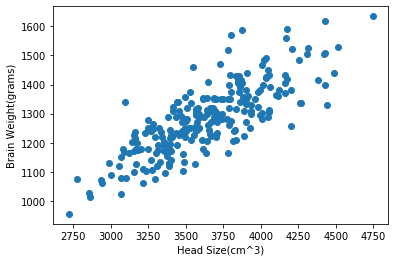

In [12]:
X = dataset['Head Size(cm^3)'].values
Y = dataset['Brain Weight(grams)'].values
print (X[0:5])  # Just to check
print (Y[0:5])
plt.scatter(X,Y)
plt.xlabel("Head Size(cm^3)")
plt.ylabel("Brain Weight(grams)")
plt.show()

Now we'll get the mean of X and Y as we need them for our formula and also the length of dataset for value of i in summation. And then calculate value of m and b.

In [10]:
x_mean = np.mean(X)
y_mean = np.mean(Y)
n = len(X)
p,q = 0,0

for i in range(n):
    p = p + (X[i] - x_mean)*(Y[i] - y_mean)
    q = q + (X[i] - x_mean)**2
    
m = p/q
b = y_mean - m*x_mean
print("slope = ", m)
print("y-intercept = ",b)

slope =  0.26342933948939945
y-intercept =  325.57342104944223


So, now we found the relationship between our variables , i.e.

### Brain_weights =  325.57342104944223 +  0.26342933948939945*Head_size
So, now let's plot it with our line.

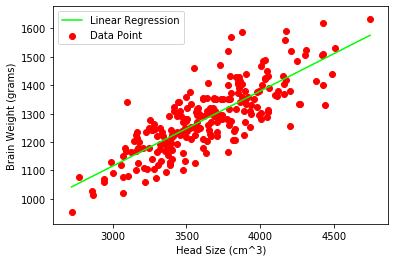

In [26]:
x = np.linspace(np.min(X),np.max(X),1000)
y = b + m * x
plt.plot(x, y, color='#00ff00', label='Linear Regression')  #will plot the line
plt.scatter(X, Y, color='#ff0000', label='Data Point')      #will plot the datapoints
plt.xlabel('Head Size (cm^3)')
plt.ylabel('Brain Weight (grams)')
plt.legend()
plt.show()

__Linspace__ creates a row vector of 1000 (or as mentioned) points linearly spaced between x and y.
Now we can calulate the accuracy of our model by two methods- __Root mean squared error__ and __coefficient of Determination (R² Score)__.

__Root Mean Squared Error__ is the square root of the sum of all errors divided by the number of values.
$ RMSE = \sqrt(\frac{\sum_{j=1}^n (y_j -\hat{y_j})^2}{n}) $

$ y_j $ is the actual outcome value in dataset and $\hat{y_j} $ is the predicted outcome value by the equation we got.

In [27]:
rmse = 0
for i in range(n):
    y_pred=  b + m* X[i]
    rmse += (Y[i] - y_pred) ** 2
    
rmse = np.sqrt(rmse/n)

print(rmse)

72.1206213783709


There is no applicable value for RMSE but lesser the value of RMSE , more the accuracy of model.

__R² score__ is the measure of the accuracy of our linear model.This value ranges from 0 to 1. Value ‘1’ indicates predictor perfectly accounts for all the variation in Y. Value ‘0’ indicates that predictor ‘x’ accounts for no variation in ‘y’.It will also become negative if the model is completely wrong

$$ R^2 = \frac{SSR}{SST} = \frac{\sum (\hat{y_i} - \bar{y})^2}{\sum (y_i - \bar{y})^2} $$

__SST__ is the total sum of squares and tells how much the data point move around the mean.

  __SST = Sum of (Actual_output - average_of_actual_output)**2__
 
__SSR__ is the total sum of squares of residuals and gives information about how far estimated regression line is from the horizontal ‘no relationship’ line (average of actual output).

  __SSR = Sum of (Predicted_output - average_of_actual_output)**2__

In [28]:
sumofsquares = 0
sumofresiduals = 0

for i in range(n) :
    y_pred = b + m * X[i]
    sumofsquares += (Y[i] - y_mean) ** 2
    sumofresiduals += (Y[i] - y_pred) **2
    
score  = 1 - (sumofresiduals/sumofsquares)

print(score)

0.6393117199570003


### Gradient Descent Approach.
Gradient Descent approach aims to find the minimum of loss function. 
__Loss function__ is the error in our predicted value of m and b. We can calculate loss by Mean Squared Error function.

$$ E = \frac{1}{n}\sum_{i=0}^n (y_i - \hat{y_i})^2 $$
where $y_i$ is actual value and $\hat{y_i}$ is predicted value. The equation can also be written as :
$$ E = \frac{1}{n}\sum_{i=0}^n (y_i -(mx_i +b))^2 $$

First we'll initialize by keeping m and b both as 0. Then, we'll calculate the partial derivative of the loss function with respect to m and b separately .
$$ D_m = \frac{-2}{n}\sum_{i=0}^n x_i(y_i - \hat{y_i}) $$
and 
$$ D_b = \frac{-2}{n}\sum_{i=0}^n (y_i - \hat{y_i}) $$

And then calculate the current value of m and b using the following equations:
$$ m = m -L*D_m $$
$$ b = b -L*D_b $$

Here, L is the learning rate, which  controls how much the value of m changes with each iteration. The most commonly used rates are : 0.001, 0.003, 0.01, 0.03, 0.1, 0.3.

Let's calculate on the new dataset of Standard Metropolitan Areas Data.

In [41]:
dataset2 = pd.read_csv('Standard Metropolitan Areas Data - train_data - data.csv')
dataset2.head()

,land_area,percent_city,percent_senior,physicians,hospital_beds,graduates,work_force,income,region,crime_rate
0,1384,78.1,12.3,25627,69678,50.1,4083.9,72100,1,75.55
1,3719,43.9,9.4,13326,43292,53.9,3305.9,54542,2,56.03
2,3553,37.4,10.7,9724,33731,50.6,2066.3,33216,1,41.32
3,3916,29.9,8.8,6402,24167,52.2,1966.7,32906,2,67.38
4,2480,31.5,10.5,8502,16751,66.1,1514.5,26573,4,80.19


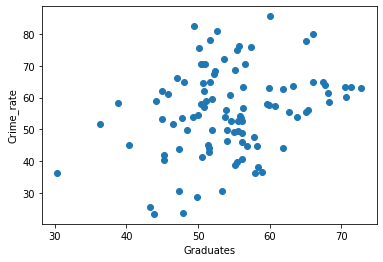

 m =  1.010902020334535
 b =  0.029217017247449982


In [44]:
X = dataset2['graduates'].values
Y = dataset2['crime_rate'].values
plt.scatter(X,Y)
plt.xlabel("Graduates")
plt.ylabel("Crime_rate")
plt.show()
m = 0
b = 0
L = 0.0001
n = len(X)
for i in range(n):
    Y_pred = m*X + b
    D_m = (-2/n) * sum(X * (Y - Y_pred))  
    D_b = (-2/n) * sum(Y - Y_pred) 
    m = m - L * D_m 
    b = b - L * D_b
print (" m = " , m)
print(" b = ", b)

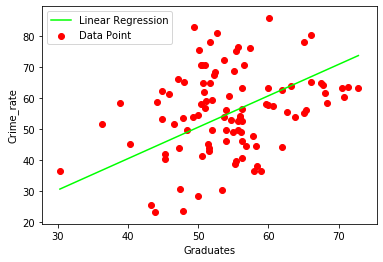

In [45]:
x = np.linspace(np.min(X),np.max(X),1000)
y = b + m * x
plt.plot(x, y, color='#00ff00', label='Linear Regression')  #will plot the line
plt.scatter(X, Y, color='#ff0000', label='Data Point')      #will plot the datapoints
plt.xlabel('Graduates')
plt.ylabel('Crime_rate')
plt.legend()
plt.show()